In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import logging
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

In [7]:
import pandas as pd

train_data_path = '/Users/preethi/Desktop/illness_datasetnew.csv'
#test_data_path = '/Users/preethi/Downloads/CaseStudy/src/test_data_X.csv'
    
def load_data():
        """
        This method used to load train and test data
        :return: None
        """
        try:
            train_dataset = pd.read_csv(train_data_path)
            #test_dataset = pd.read_csv(test_data_path)
        except FileNotFoundError as ex:
            logging.error(ex)
            raise ex
        
        return train_dataset
        
print('The data set is loaded')

The data set is loaded


In [8]:
train_dataset = load_data()

In [9]:
print('The Training data set is ')
train_dataset.head()

The Training data set is 


,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367,No
1,2,Dallas,Male,54,45084,No
2,3,Dallas,Male,42,52483,No
3,4,Dallas,Male,40,40941,No
4,5,Dallas,Male,46,50289,Yes


In [10]:
print('The Training data Info')
train_dataset.info()

The Training data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Number   150000 non-null  int64 
 1   City     150000 non-null  object
 2   Gender   150000 non-null  object
 3   Age      150000 non-null  int64 
 4   Income   150000 non-null  int64 
 5   Illness  150000 non-null  object
dtypes: int64(3), object(3)
memory usage: 6.9+ MB


In [11]:
train_dataset.isnull().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

In [12]:
train_dataset.describe()

,Number,Age,Income
count,150000.000000,150000.000000,150000.000000
mean,75000.500000,44.950200,91252.802633
std,43301.414527,11.572486,24989.484970
min,1.000000,25.000000,0.000000
25%,37500.750000,35.000000,80867.750000
50%,75000.500000,45.000000,93655.000000
75%,112500.250000,55.000000,104519.000000
max,150000.000000,65.000000,177157.000000


Saving figure attribute_histogram_plots


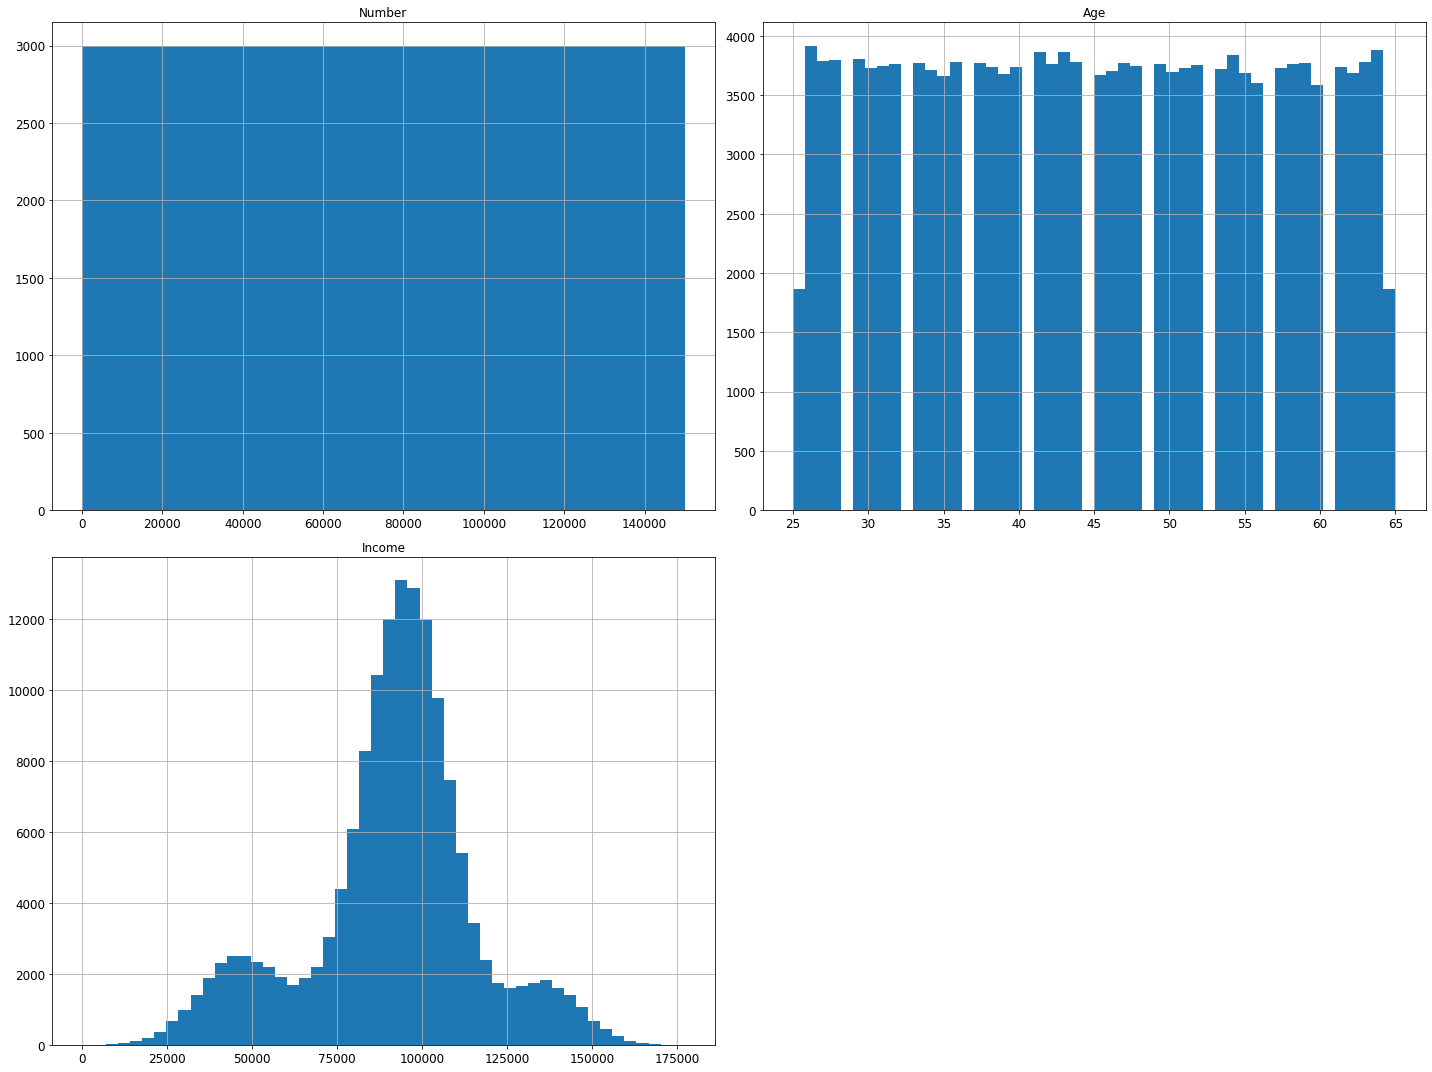

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
train_dataset.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [29]:
import numpy as np
np.random.seed(42)

In [30]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(train_dataset, test_size=0.2, random_state=42)

In [16]:
test_set.head()

,Number,City,Gender,Age,Income,Illness
59770,59771,New York City,Male,49,102931,No
21362,21363,New York City,Male,45,99505,Yes
127324,127325,Washington D.C.,Male,40,67579,No
140509,140510,Austin,Male,37,90818,No
144297,144298,Austin,Male,65,89077,No


# Prepare the data set

In [32]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

prediction_column = ["Illness"]
def preprocess_data(input_df):
        """
        This method used to pre-process the data
        :param input_df: input data frame to pre-process the data
        :return: processed data set
        """
        dict_illness = {'No': 0, 'Yes': 1}
        dict_sex = {'Male': 0, 'Female': 1}
        simple_imputer = SimpleImputer(strategy='mean')

        # Id_Number,City,Gender,Age,Weight,Illness
        data_columns = list(input_df.columns)
        processed_dataset = input_df[data_columns].dropna()

        simple_imputer.fit(processed_dataset[['Age']])
        processed_dataset[['Age']] = simple_imputer.transform(processed_dataset[['Age']])

        if "Illness" in data_columns:
            processed_dataset['Illness'] = processed_dataset[prediction_column].replace(dict_illness)

        processed_dataset['Gender'] = processed_dataset['Gender'].replace(dict_sex)
        label_encoder = LabelEncoder()
        processed_dataset['City'] = label_encoder.fit(processed_dataset["City"])\
                                    .transform(processed_dataset["City"])

        return processed_dataset

In [33]:
final_processed_train_dataset = preprocess_data(train_dataset)
#final_processed_test_dataset = preprocess_data(test_dataset)

# Select and train a model 

In [34]:
feature_list = list(final_processed_train_dataset.columns)

feature_index = '123'

selected_features = [feature_list[int(feature_index)-1] for feature_index in str(feature_index)]

    
def split_train_dataset():
    """
    This method will split the input training data set and select the user features
    :return: X axis training data set , Y axis training data set,
     X axis validation data set  and Y axis validation data set
    """
    print(f'Features selected: {selected_features}')

    train_size = 0.08

    x_train, x_validation, y_train, y_validation = \
        train_test_split(final_processed_train_dataset[selected_features],
                         final_processed_train_dataset[prediction_column], train_size=train_size)

    return x_train, x_validation, y_train, y_validation

In [35]:
x_train, x_validation, y_train, y_validation = split_train_dataset()

Features selected: ['Number', 'City', 'Gender']


In [21]:
import pickle
import time
import logging


from sklearn.model_selection import train_test_split
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
    
def build_model(x_train_data=None, y_train_data=None):
    """
    BUILD REGRESSION MODEL WITH 0.68 and it will be > 91%
    This method will receive X , Y training data set and build a model based on user choice
    :param x_train_data: X axis training data set
    :param y_train_data: Y axis training data set
    :return: None
    """


    clf = DecisionTreeClassifier().fit(x_train_data, y_train_data)

    model_save_flag = 'Y'

    if model_save_flag.upper() == 'Y':
        t_stamp = time.strftime("%Y%m%d-%H%M%S")
        model_file = f"{t_stamp}.DecisionTreeClassifier.pickle"
        with open(model_file, 'wb') as model_file_ref:
            pickle.dump(clf, model_file_ref)

        print(f'The model is built and saved as {model_file}...')

    return clf


In [22]:
selected_model = build_model(x_train_data=x_train, y_train_data=y_train)

The model is built and saved as 20201116-164207.DecisionTreeClassifier.pickle...


In [ ]:
# Execute Model and Predict 

In [40]:

test_data_output_csv = "test_data_y_pred.csv"
def execute_model_prediction(x_validation, y_validation):
        """
        This method will execute the model predictions and save the predictions
        :param x_validation: X axis validation set
        :param y_validation: Y axis validation set
        :return: None
        """
        accuracy = selected_model.score(x_validation, y_validation)

        print(f'The accuracy of the model is {accuracy:.5f}')

        #print("Do you want to see the confusion matrix? (y/n)")

        confuse_mtx_flag = 'Y' #str(input().strip())

        y_pred = selected_model.predict(x_validation)

        if confuse_mtx_flag.upper() == 'Y':
            print(confusion_matrix(y_validation, y_pred))

        #print("Do you want to save the outcome for the test data ? (y/n)")

        outcome_flag = 'Y' #str(input().strip())

        if outcome_flag.upper() == 'Y':
            #y_pred = selected_model.predict(final_processed_test_dataset[selected_features])
            final_df = pd.DataFrame(y_pred,columns=["Illness"])
            #final_result_df = self.test_dataset.append(final_df["Illness"])
            list_of_values = final_df["Illness"].tolist()
            #final_processed_test_dataset["Illness"] = list_of_values
            #final_processed_test_dataset.to_csv(test_data_output_csv)
           

In [41]:
execute_model_prediction(x_validation, y_validation)

The accuracy of the model is 0.83155
[[113511  12217]
 [ 11029   1243]]


In [ ]:
#Random forest

In [42]:
import pickle
import time
import logging
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from sklearn.model_selection import train_test_split
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
    
def build_model(x_train_data=None, y_train_data=None):
    """
    BUILD REGRESSION MODEL WITH 0.68 and it will be > 91%
    This method will receive X , Y training data set and build a model based on user choice
    :param x_train_data: X axis training data set
    :param y_train_data: Y axis training data set
    :return: None
    """


    clf = RandomForestClassifier().fit(x_train_data, y_train_data)

    model_save_flag = 'Y'

    if model_save_flag.upper() == 'Y':
        t_stamp = time.strftime("%Y%m%d-%H%M%S")
        model_file = f"{t_stamp}.RandomForestClassifier.pickle"
        with open(model_file, 'wb') as model_file_ref:
            pickle.dump(clf, model_file_ref)

        print(f'The model is built and saved as {model_file}...')

    return clf


In [43]:
selected_model = build_model(x_train_data=x_train, y_train_data=y_train)

<ipython-input-42-581382ad2eb2>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = RandomForestClassifier().fit(x_train_data, y_train_data)


The model is built and saved as 20201116-165011.RandomForestClassifier.pickle...


In [44]:
test_data_output_csv = "test_data_y_pred.csv"
def execute_model_prediction(x_validation, y_validation):
        """
        This method will execute the model predictions and save the predictions
        :param x_validation: X axis validation set
        :param y_validation: Y axis validation set
        :return: None
        """
        accuracy = selected_model.score(x_validation, y_validation)

        print(f'The accuracy of the model is {accuracy:.5f}')

        #print("Do you want to see the confusion matrix? (y/n)")

        confuse_mtx_flag = 'Y' #str(input().strip())

        y_pred = selected_model.predict(x_validation)

        if confuse_mtx_flag.upper() == 'Y':
            print(confusion_matrix(y_validation, y_pred))

        #print("Do you want to save the outcome for the test data ? (y/n)")

        outcome_flag = 'Y' #str(input().strip())

        if outcome_flag.upper() == 'Y':
            #y_pred = selected_model.predict(final_processed_test_dataset[selected_features])
            final_df = pd.DataFrame(y_pred,columns=["Illness"])
            #final_result_df = self.test_dataset.append(final_df["Illness"])
            list_of_values = final_df["Illness"].tolist()
            #final_processed_test_dataset["Illness"] = list_of_values
            #final_processed_test_dataset.to_csv(test_data_output_csv)
           

In [45]:
execute_model_prediction(x_validation, y_validation)

The accuracy of the model is 0.83381
[[113845  11883]
 [ 11051   1221]]


In [ ]:
#Naive Bayes

In [46]:
import pickle
import time
import logging
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from sklearn.model_selection import train_test_split
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

def build_model(x_train_data=None, y_train_data=None):
    """
    BUILD REGRESSION MODEL WITH 0.68 and it will be > 91%
    This method will receive X , Y training data set and build a model based on user choice
    :param x_train_data: X axis training data set
    :param y_train_data: Y axis training data set
    :return: None
    """


    clf = GaussianNB().fit(x_train_data, y_train_data)

    model_save_flag = 'Y'

    if model_save_flag.upper() == 'Y':
        t_stamp = time.strftime("%Y%m%d-%H%M%S")
        model_file = f"{t_stamp}.GaussianNB.pickle"
        with open(model_file, 'wb') as model_file_ref:
            pickle.dump(clf, model_file_ref)

        print(f'The model is built and saved as {model_file}...')

    return clf

In [47]:
selected_model = build_model(x_train_data=x_train, y_train_data=y_train)

The model is built and saved as 20201116-165054.GaussianNB.pickle...


/Users/preethi/Downloads/python3env/lib/python3.9/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [48]:
test_data_output_csv = "test_data_y_pred.csv"
def execute_model_prediction(x_validation, y_validation):
        """
        This method will execute the model predictions and save the predictions
        :param x_validation: X axis validation set
        :param y_validation: Y axis validation set
        :return: None
        """
        accuracy = selected_model.score(x_validation, y_validation)

        print(f'The accuracy of the model is {accuracy:.5f}')

        #print("Do you want to see the confusion matrix? (y/n)")

        confuse_mtx_flag = 'Y' #str(input().strip())

        y_pred = selected_model.predict(x_validation)

        if confuse_mtx_flag.upper() == 'Y':
            print(confusion_matrix(y_validation, y_pred))

        #print("Do you want to save the outcome for the test data ? (y/n)")

        outcome_flag = 'Y' #str(input().strip())

        if outcome_flag.upper() == 'Y':
            #y_pred = selected_model.predict(final_processed_test_dataset[selected_features])
            final_df = pd.DataFrame(y_pred,columns=["Illness"])
            #final_result_df = self.test_dataset.append(final_df["Illness"])
            list_of_values = final_df["Illness"].tolist()
            #final_processed_test_dataset["Illness"] = list_of_values
            #final_processed_test_dataset.to_csv(test_data_output_csv)

In [49]:
execute_model_prediction(x_validation, y_validation)

The accuracy of the model is 0.91107
[[125728      0]
 [ 12272      0]]
